--- Memuat Data dan Melatih Model Baseline ---
Performa Model Baseline (Semua Fitur):
  - Mean Squared Error (MSE): 24.29
  - R-squared (R2): 0.67

--- Tugas 1: Mengevaluasi Metode Seleksi Fitur ---
Metode Filter (SelectKBest dengan 10 fitur):
  - MSE: 27.22
  - R2: 0.63

Metode Wrapper (RFE dengan 10 fitur):
  - MSE: 23.80
  - R2: 0.68

Metode Embedded (Lasso dengan alpha=1.0):
  - Jumlah Fitur Dipilih: 10
  - MSE: 24.41
  - R2: 0.67

--- Tugas 2: Mengevaluasi Metode Scaling ---
Boxplot untuk visualisasi outlier telah disimpan sebagai 'boston_boxplot.png'

Metode Min-Max Scaling:
  - MSE: 24.29

Metode Standard Scaling:
  - MSE: 24.29

Metode Robust Scaling:
  - MSE: 24.29

--- Tugas 3: Mengevaluasi Discretization ---
Model dengan Discretization pada 'LSTAT' dan 'AGE':
  - MSE: 21.87
  - R2: 0.70



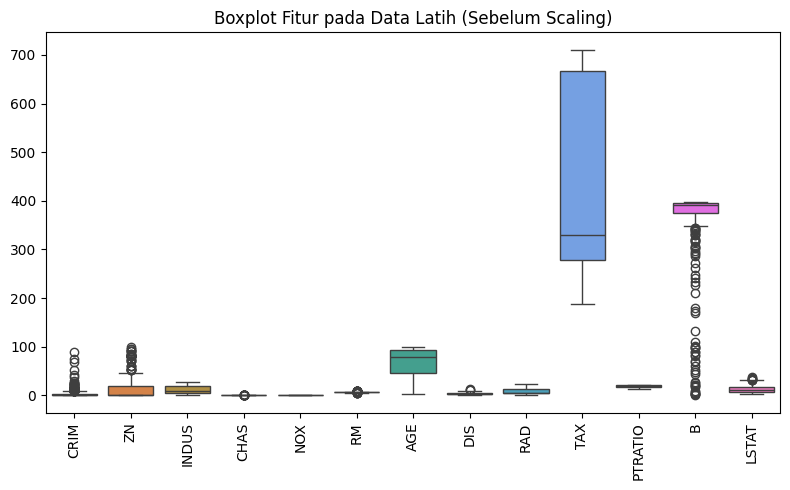

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, KBinsDiscretizer, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Langkah 0: Memuat Data dan Model Baseline ---

print("--- Memuat Data dan Melatih Model Baseline ---")
# Memuat dataset dari URL publik
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Membuat DataFrame pandas
X = pd.DataFrame(data, columns=feature_names)
y = pd.Series(target, name='PRICE')

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model dasar (Baseline) untuk perbandingan
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Evaluasi model dasar
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"Performa Model Baseline (Semua Fitur):")
print(f"  - Mean Squared Error (MSE): {mse_baseline:.2f}")
print(f"  - R-squared (R2): {r2_baseline:.2f}\n")


# --- Tugas 1: Seleksi Fitur (Feature Selection) ---

print("--- Tugas 1: Mengevaluasi Metode Seleksi Fitur ---")
# Metode 1: Filter (SelectKBest)
selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
X_test_kbest = selector_kbest.transform(X_test)
model_kbest = LinearRegression().fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
mse_kbest = mean_squared_error(y_test, y_pred_kbest)
r2_kbest = r2_score(y_test, y_pred_kbest)
print(f"Metode Filter (SelectKBest dengan 10 fitur):")
print(f"  - MSE: {mse_kbest:.2f}")
print(f"  - R2: {r2_kbest:.2f}\n")

# Metode 2: Wrapper (Recursive Feature Elimination - RFE)
estimator = LinearRegression()
selector_rfe = RFE(estimator, n_features_to_select=10, step=1)
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)
model_rfe = LinearRegression().fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)
print(f"Metode Wrapper (RFE dengan 10 fitur):")
print(f"  - MSE: {mse_rfe:.2f}")
print(f"  - R2: {r2_rfe:.2f}\n")

# Metode 3: Embedded (Lasso Regression)
model_lasso = Lasso(alpha=1.0, random_state=42)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
n_features_lasso = np.sum(model_lasso.coef_ != 0)
print(f"Metode Embedded (Lasso dengan alpha=1.0):")
print(f"  - Jumlah Fitur Dipilih: {n_features_lasso}")
print(f"  - MSE: {mse_lasso:.2f}")
print(f"  - R2: {r2_lasso:.2f}\n")


# --- Tugas 2: Normalisasi dan Standardisasi Data ---

print("--- Tugas 2: Mengevaluasi Metode Scaling ---")
# Visualisasi outlier untuk justifikasi Robust Scaling
plt.figure(figsize=(8, 5))
sns.boxplot(data=X_train)
plt.title('Boxplot Fitur pada Data Latih (Sebelum Scaling)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('boston_boxplot.png')
print("Boxplot untuk visualisasi outlier telah disimpan sebagai 'boston_boxplot.png'\n")

# Metode 1: Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)
model_minmax = LinearRegression().fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
print(f"Metode Min-Max Scaling:")
print(f"  - MSE: {mse_minmax:.2f}\n")

# Metode 2: Standard Scaling
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)
model_std = LinearRegression().fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)
mse_std = mean_squared_error(y_test, y_pred_std)
print(f"Metode Standard Scaling:")
print(f"  - MSE: {mse_std:.2f}\n")

# Metode 3: Robust Scaling
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)
model_robust = LinearRegression().fit(X_train_robust, y_train)
y_pred_robust = model_robust.predict(X_test_robust)
mse_robust = mean_squared_error(y_test, y_pred_robust)
print(f"Metode Robust Scaling:")
print(f"  - MSE: {mse_robust:.2f}\n")


# --- Tugas 3: Discretization pada Fitur Numerik ---

print("--- Tugas 3: Mengevaluasi Discretization ---")
# Membuat transformer untuk discretization pada fitur 'LSTAT' dan 'AGE'
discretizer = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile')
ct = ColumnTransformer(
    [('discretize', discretizer, ['LSTAT', 'AGE'])],
    remainder='passthrough'
)

# Membuat pipeline untuk menggabungkan transformer dan model
pipeline = Pipeline([
    ('transformer', ct),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
y_pred_discrete = pipeline.predict(X_test)
mse_discrete = mean_squared_error(y_test, y_pred_discrete)
r2_discrete = r2_score(y_test, y_pred_discrete)
print(f"Model dengan Discretization pada 'LSTAT' dan 'AGE':")
print(f"  - MSE: {mse_discrete:.2f}")
print(f"  - R2: {r2_discrete:.2f}\n")